### Car Brand Clustering¶

#### Import python libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score


In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture

#### Importing dataset

In [210]:
# Importing the dataset
dataset = pd.read_csv('D:\\desktop files\\weka\\Datasets\\Prof Ugwu\\clustering_dataset\\online_shoppers_intention.csv')


In [211]:
dataset

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Month,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,Feb,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2,Feb,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3,Feb,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4,Feb,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4,Feb,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1,Dec,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8,Nov,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13,Nov,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11,Nov,Returning_Visitor,False,False


### dataset values and some columns dropped

In [264]:
X = dataset.iloc[:,:-4].values
# X = np.array([X])
X = pd.DataFrame(X)

In [216]:
list(dataset)

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'Month',
 'VisitorType',
 'Weekend',
 'Revenue']

In [265]:
X.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,2.0,64.0,0.0,0.1,0.0,0.0,2.0,2.0,1.0,2.0


### getting label column from dataset

In [219]:
label_column = dataset.iloc[:,17]
label_column.head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

### getting the different values in label column

In [220]:
label_column.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

### Re-asigning the columns name to the retained columns and also converting the dataset type from object to int

In [266]:
X.columns = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','OperatingSystems','Browser','Region','TrafficType']
X.head(2)
X = X.apply(pd.to_numeric, axis=0)


### Dumping columns with alot of zero(s)

In [268]:
X = X.drop(['Administrative','Administrative_Duration','Informational','Informational_Duration','SpecialDay'],axis=1)
X.head(2)

,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,OperatingSystems,Browser,Region,TrafficType
0,1.0,0.0,0.2,0.2,0.0,1.0,1.0,1.0,1.0
1,2.0,64.0,0.0,0.1,0.0,2.0,2.0,1.0,2.0


In [269]:
X.isnull().sum()

ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
dtype: int64

### Replacing null values with column mean

In [270]:
df = X.replace(0, np.nan)
df_means = df.mean()
X = df.fillna(df_means)
X.isnull().sum()

ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
dtype: int64

In [271]:
X.head(2)

,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,OperatingSystems,Browser,Region,TrafficType
0,1.0,1272.675671,0.200000,0.2,26.598736,1.0,1.0,1.0,1.0
1,2.0,64.000000,0.040167,0.1,26.598736,2.0,2.0,1.0,2.0


In [ ]:
# X.to_csv('D:\\desktop files\\weka\\Datasets\\Prof Ugwu\\clustering_dataset\\cars_for_cluster.csv')

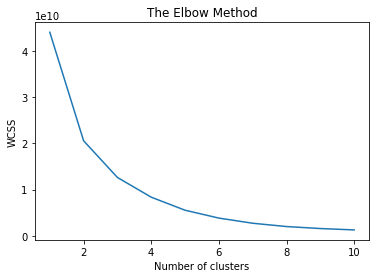

In [272]:
# Using the elbow method to find  the optimal number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


### Clustering dataset with K-means unsupervised algorithm and plotting the scattered graph to visualise the clusters

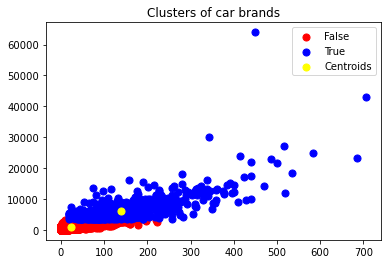

In [297]:

# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0) 
# kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=100,random_state=0) 

y_kmeans = kmeans.fit_predict(X)

# X = X.to_numpy()

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=50,c='red',label='False')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=50,c='blue',label='True')
# plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green',label='Europe')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='yellow',label='Centroids')
plt.title('Clusters of car brands')
plt.legend()
plt.show()

### using gaussianmixture algorithm

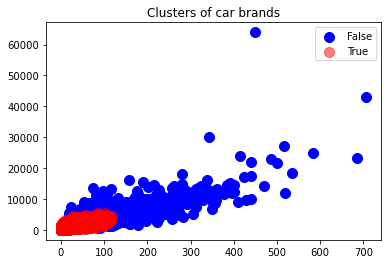

In [286]:
# Applying k-means to the cars dataset
# kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
# kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=100,random_state=0) 
gausmix = GaussianMixture(n_components=2)

y_gausmix = gausmix.fit_predict(X)

# X = X.to_numpy()

# Visualising the clusters
plt.scatter(X[y_gausmix == 0, 0], X[y_gausmix == 0,1],s=100,c='blue',label='False', alpha=1)
plt.scatter(X[y_gausmix == 1, 0], X[y_gausmix == 1,1],s=100,c='red',label='True', alpha=.5)
# plt.scatter(X[y_gausmix == 2, 0], X[y_gausmix == 2,1],s=100,c='green',label='Europe')
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of car brands')
plt.legend()
plt.show()

### Checking the accuracy of the cluster by comparing it with the original label column

In [296]:
labels = kmeans.labels_
accuracy = accuracy_score(dataset['Revenue'], labels)
accuracy1 = accuracy_score(dataset['Revenue'], y_gausmix)

accuracy = accuracy*100
accuracy1 = accuracy1*100

print('Kmeans Accuracy: ' + str(accuracy))
print('Gaussian Accuracy: ' + str(accuracy1))

Kmeans Accuracy: 81.76804541768045
Gaussian Accuracy: 14.655312246553123


In [39]:
dataset['cluster'] = labels

In [40]:
dataset.head(3)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,cluster
0,14.0,8,350,165,4209,12,1972,US.,2
1,31.9,4,89,71,1925,14,1980,Europe.,1
2,17.0,8,302,140,3449,11,1971,US.,0


In [63]:
print("Japan clusters")
print(dataset.loc[dataset[' brand'] == ' Japan.']['cluster'].value_counts())  #get the frequency of each value in the 'cluster' attribute

Japan clusters
1    46
0     5
Name: cluster, dtype: int64


In [64]:
print("US clusters")
print(dataset.loc[dataset[' brand'] == ' US.']['cluster'].value_counts())  #get the frequency of each value in the 'cluster' attribute

US clusters
0    64
2    61
1    37
Name: cluster, dtype: int64


In [66]:
#  US.        162
#  Japan.      51
#  Europe.     48
# Name:  brand, dtype: int64

print("Europe clusters")
print(dataset.loc[dataset[' brand'] == ' Europe.']['cluster'].value_counts())  #get the frequency of each value in the 'cluster' attribute

Europe clusters
1    35
0    12
2     1
Name: cluster, dtype: int64


In [48]:
print(dataset['cluster'].value_counts())  #get the frequency of each value in the 'cluster' attribute

1    118
0     81
2     62
Name: cluster, dtype: int64


In [44]:
cluster_1 = dataset.loc[dataset['cluster'] == 1]   #get only the datapoints with cluster value of 1
cluster_1

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,cluster
1,31.9,4,89,71,1925,14,1980,Europe.,1
4,30.5,4,98,63,2051,17,1978,US.,1
9,37.7,4,89,62,2050,17,1982,Japan.,1
10,34.0,4,108,70,2245,17,1983,Japan.,1
11,34.3,4,97,78,2188,16,1981,Europe.,1
...,...,...,...,...,...,...,...,...,...
249,29.0,4,135,84,2525,16,1983,US.,1
250,32.1,4,98,70,2120,16,1981,US.,1
251,24.0,4,121,110,2660,14,1974,Europe.,1
255,24.0,4,113,95,2372,15,1971,Japan.,1


### GaussianMixture Cluster Algorithm

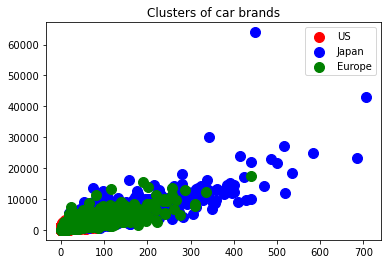

In [298]:
# Applying k-means to the cars dataset
# kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
# kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=100,random_state=0) 
gausmix = GaussianMixture(n_components=2)

y_gausmix = gausmix.fit_predict(X)

# X = X.to_numpy()

# Visualising the clusters
plt.scatter(X[y_gausmix == 0, 0], X[y_gausmix == 0,1],s=100,c='red',label='US')
plt.scatter(X[y_gausmix == 1, 0], X[y_gausmix == 1,1],s=100,c='blue',label='Japan')
plt.scatter(X[y_gausmix == 2, 0], X[y_gausmix == 2,1],s=100,c='green',label='Europe')
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of car brands')
plt.legend()
plt.show()

In [69]:
dataset['g_cluster'] = y_gausmix

In [70]:
dataset.head(2)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,cluster,g_cluster
0,14.0,8,350,165,4209,12,1972,US.,2,1
1,31.9,4,89,71,1925,14,1980,Europe.,1,0


In [71]:
print("Japan clusters")
print(dataset.loc[dataset[' brand'] == ' Japan.']['g_cluster'].value_counts())  #get the frequency of each value in the 'cluster' attribute

Japan clusters
0    44
2     7
Name: g_cluster, dtype: int64


In [72]:
#  US.        162
#  Japan.      51
#  Europe.     48
# Name:  brand, dtype: int64

print("Europe clusters")
print(dataset.loc[dataset[' brand'] == ' Europe.']['g_cluster'].value_counts())  #get the frequency of each value in the 'cluster' attribute

Europe clusters
0    42
2     6
Name: g_cluster, dtype: int64


In [73]:
#  US.        162
#  Japan.      51
#  Europe.     48
# Name:  brand, dtype: int64

print("US clusters")
print(dataset.loc[dataset[' brand'] == ' US.']['cluster'].value_counts())  #get the frequency of each value in the 'cluster' attribute

US clusters
0    64
2    61
1    37
Name: cluster, dtype: int64


In [242]:
from sklearn.cluster import AgglomerativeClustering

a_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
a_cluster.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

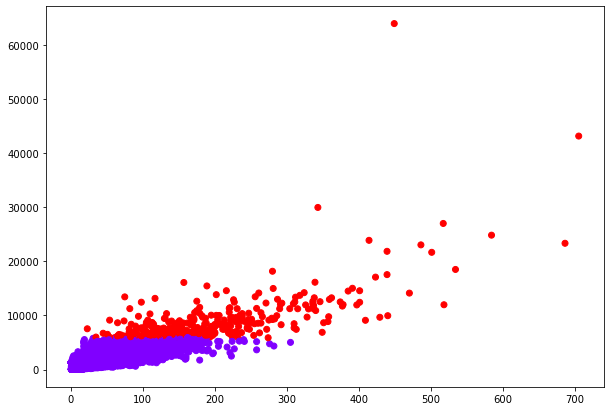

In [299]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=a_cluster.labels_, cmap='rainbow')

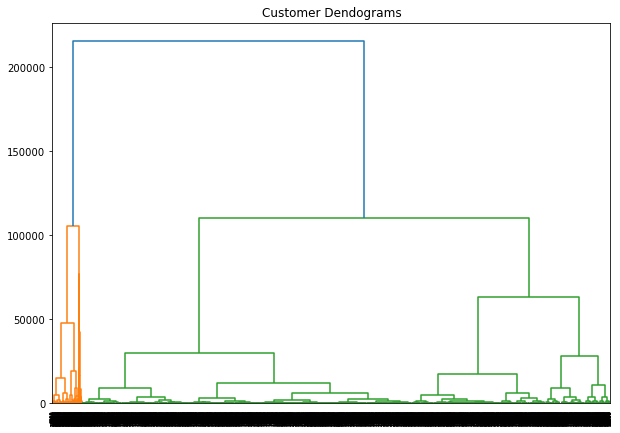

In [300]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

## Clustering On Dresses Dataset

In [90]:
# Importing the dataset
dresses = pd.read_csv('D:\\desktop files\\weka\\Datasets\\Prof Ugwu\\clustering_dataset\\Dresses_Attribute_Sales\\dresses_dataset.csv')


In [93]:
dresses

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,713391965,Casual,Low,4.7,M,Spring,o-neck,full,natural,polyster,NaN,NaN,solid,1
496,722565148,Sexy,Low,4.3,free,Summer,o-neck,full,empire,cotton,NaN,NaN,NaN,0
497,532874347,Casual,Average,4.7,M,Summer,v-neck,full,empire,cotton,NaN,lace,solid,1
498,655464934,Casual,Average,4.6,L,winter,boat-neck,sleevless,empire,silk,broadcloth,applique,print,1


In [181]:
dresses['Rating'].value_counts()

0.0    120
4.7     84
4.8     57
5.0     55
4.6     54
4.5     34
4.4     27
4.9     25
4.3     20
4.0      7
4.2      6
4.1      5
3.7      2
3.6      1
3.0      1
1.0      1
3.5      1
Name: Rating, dtype: int64

In [92]:
dresses.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
waiseline          87
Material          128
FabricType        266
Decoration        236
Pattern Type      109
Recommendation      0
dtype: int64

In [102]:
dress = dresses.iloc[:,:-1].values
dress = pd.DataFrame(dress)

In [160]:
dress

,Style,Price,Rating,Size,Season,Neckline,Sleevelength,Waiseline,Material,Fabrictype,Decoration,Pattern
0,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal
1,Casual,Low,0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal
2,vintage,High,0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print
3,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print
4,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Casual,Low,4.7,M,Spring,o-neck,full,natural,polyster,NaN,NaN,solid
496,Sexy,Low,4.3,free,Summer,o-neck,full,empire,cotton,NaN,NaN,NaN
497,Casual,Average,4.7,M,Summer,v-neck,full,empire,cotton,NaN,lace,solid
498,Casual,Average,4.6,L,winter,boat-neck,sleevless,empire,silk,broadcloth,applique,print


In [104]:
dresses.head(2)

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0


In [105]:
# X = X.apply(pd.to_numeric, axis=0)
dress.columns = ['D', 'Style', 'Price', 'Rating', 'Size', 'Season', 'Neckline', 'Sleevelength', 'Waiseline', 'Material', 'Fabrictype', 'Decoration', 'Pattern']
dress.head(2)

,D,Style,Price,Rating,Size,Season,Neckline,Sleevelength,Waiseline,Material,Fabrictype,Decoration,Pattern
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal
1,1212192089,Casual,Low,0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal


In [163]:
dress = dress.drop(['Waiseline','Material','Fabrictype','Decoration','Pattern'], axis=1)

In [164]:
dress.head(2)

,Style,Price,Rating,Size,Season,Neckline,Sleevelength
0,Sexy,Low,4.6,M,Summer,o-neck,sleevless
1,Casual,Low,0,L,Summer,o-neck,Petal


In [165]:
onehot_dress = pd.get_dummies(dress)
onehot_dress.head(5)

,Style_Brief,Style_Casual,Style_Flare,Style_Novelty,Style_OL,Style_Sexy,Style_bohemian,Style_cute,Style_fashion,Style_party,...,Sleevelength_short,Sleevelength_sleeevless,Sleevelength_sleeveless,Sleevelength_sleevless,Sleevelength_sleveless,Sleevelength_threequarter,Sleevelength_threequater,Sleevelength_thressqatar,Sleevelength_turndowncollor,Sleevelength_urndowncollor
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
list(onehot_dress)

['Style_Brief',
 'Style_Casual',
 'Style_Flare',
 'Style_Novelty',
 'Style_OL',
 'Style_Sexy',
 'Style_bohemian',
 'Style_cute',
 'Style_fashion',
 'Style_party',
 'Style_sexy',
 'Style_vintage',
 'Style_work',
 'Price_Average',
 'Price_High',
 'Price_Low',
 'Price_Medium',
 'Price_high',
 'Price_low',
 'Price_very-high',
 'Rating_0.0',
 'Rating_1.0',
 'Rating_3.0',
 'Rating_3.5',
 'Rating_3.6',
 'Rating_3.7',
 'Rating_4.0',
 'Rating_4.1',
 'Rating_4.2',
 'Rating_4.3',
 'Rating_4.4',
 'Rating_4.5',
 'Rating_4.6',
 'Rating_4.7',
 'Rating_4.8',
 'Rating_4.9',
 'Rating_5.0',
 'Size_L',
 'Size_M',
 'Size_S',
 'Size_XL',
 'Size_free',
 'Size_s',
 'Size_small',
 'Season_Automn',
 'Season_Autumn',
 'Season_Spring',
 'Season_Summer',
 'Season_Winter',
 'Season_spring',
 'Season_summer',
 'Season_winter',
 'Neckline_Scoop',
 'Neckline_Sweetheart',
 'Neckline_backless',
 'Neckline_boat-neck',
 'Neckline_bowneck',
 'Neckline_halter',
 'Neckline_mandarin-collor',
 'Neckline_o-neck',
 'Neckline_ope

In [ ]:
# df = X.replace(" ", np.nan)
# df_means = df.mean()
# X = df.fillna(df_means)
# X.isnull().sum()

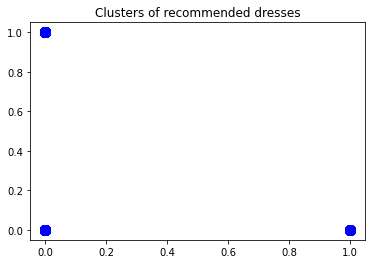

In [167]:

# Applying k-means to the cars dataset
one_kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0) 
# kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=100,random_state=0) 

onehot_kmeans = one_kmeans.fit_predict(onehot_dress)

Xdress = onehot_dress.to_numpy()

# Visualising the clusters
plt.scatter(Xdress[onehot_kmeans == 0, 0], Xdress[onehot_kmeans == 0,1],s=100,c='red')
plt.scatter(Xdress[onehot_kmeans == 1, 0], Xdress[onehot_kmeans == 1,1],s=100,c='blue')
# plt.scatter(Xdress[onehot_kmeans == 2, 0], Xdress[onehot_kmeans == 2,1],s=100,c='green',label='Europe')
# plt.scatter(one_kmeans.cluster_centers_[:,0],one_kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of recommended dresses')
# plt.legend()
plt.show()

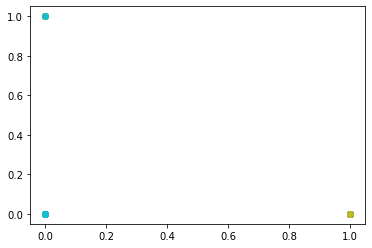

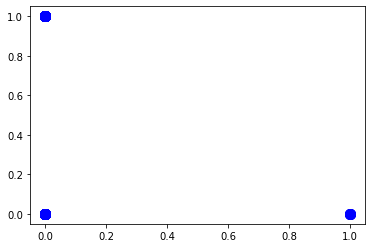

In [147]:

# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = GaussianMixture(n_components=10)
# fit the model
model.fit(onehot_dress)
# assign a cluster to each example
yhat = model.predict(onehot_dress)
xdress = onehot_dress.to_numpy()

# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(xdress[row_ix, 0], xdress[row_ix, 1])
# show the plot
plt.show()

plt.scatter(Xdress[yhat == 0, 0], Xdress[yhat == 0,1],s=100,c='blue')
plt.scatter(Xdress[yhat == 1, 0], Xdress[yhat == 1,1],s=100,c='blue')

plt.show()

In [143]:
xdress

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0]], dtype=uint8)

In [153]:
dresses['Recommendation'].value_counts()

0    290
1    210
Name: Recommendation, dtype: int64

In [168]:
accuracy_score(dresses['Recommendation'],onehot_kmeans)*100

52.800000000000004

In [169]:
dresses['cluster'] = onehot_kmeans

In [171]:
#  US.        162
#  Japan.      51
#  Europe.     48
# Name:  brand, dtype: int64

print("Zero clusters")
print(dresses.loc[dresses['Recommendation'] == 1]['cluster'].value_counts())  #get the frequency of each value in the 'cluster' attribute

Zero clusters
0    120
1     90
Name: cluster, dtype: int64


In [180]:
# Applying k-means to the cars dataset
# kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
# kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=100,random_state=0) 
gausmix = GaussianMixture(n_components=2)

d_gausmix = gausmix.fit_predict(onehot_dress)

# onehot_dress = onehot_dress.to_numpy()

# Visualising the clusters
plt.scatter(onehot_dress[d_gausmix == 0, 0], onehot_dress[d_gausmix == 0,1],s=100)
plt.scatter(onehot_dress[d_gausmix == 1, 0], onehot_dress[d_gausmix == 1,1],s=100)
# plt.scatter(onehot_dress[d_gausmix == 2, 0], onehot_dress[d_gausmix == 2,1],s=100,c='green',label='Europe')
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of Dress Recommendation')
# plt.legend()
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [175]:
accuracy_score(dresses['Recommendation'],d_gausmix)*100

51.6

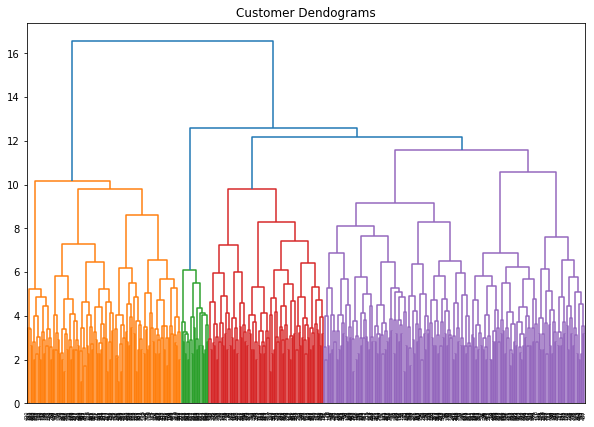

In [151]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend1 = shc.dendrogram(shc.linkage(onehot_dress, method='ward'))